In [1]:
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_new.pkl'))

df = df.dropna()
df.head()

/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,id_escola,serie,turno,desempenho_aluno_cat,leitura,frequenta_entretenimento,responsaveis_incentivam,escolaridade_pais,leitura_pais,estuda_regularmente
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,25083490,9,3,0,0.857143,0.75,1.0,2.5,1.0,1.000000
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,61134907,9,1,0,1.142857,1.75,1.0,2.0,1.0,2.000000
27117,2015,PB,1,17523323,0,LP,-1.799137,0.475179,150.864483,26.179209,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333
27118,2015,PB,1,17523323,0,MT,-1.013599,0.505411,193.311973,28.248597,...,25084526,9,1,0,0.833333,0.50,1.0,0.5,1.0,1.333333


In [2]:
# distribuição das classes
df['desempenho_aluno'].value_counts(dropna=False)

desempenho_aluno
Básico          38265
Insuficiente    21129
Proficiente     10989
Avançado         1710
Name: count, dtype: int64

In [33]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

clear_output()

In [35]:
df = df[df['disciplina'] == 'MT']

In [36]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

y = to_categorical(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# print unique values for each col
for col in range(X_train.shape[1]):
    print(col, np.unique(X_train[:, col]))

0 [0.  0.2 0.4 0.6 0.8 1. ]
1 [0. 1.]
2 [0.   0.25 0.5  0.75 1.  ]
3 [0. 1.]
4 [0.         0.07142857 0.08333333 0.1        0.125      0.14285714
 0.16666667 0.2        0.21428571 0.25       0.28571429 0.3
 0.33333333 0.35714286 0.375      0.4        0.41666667 0.42857143
 0.5        0.57142857 0.58333333 0.6        0.625      0.64285714
 0.66666667 0.7        0.71428571 0.75       0.78571429 0.8
 0.83333333 0.85714286 0.875      0.9        0.91666667 0.92857143
 1.        ]
5 [0.         0.125      0.16666667 0.25       0.33333333 0.375
 0.5        0.625      0.66666667 0.75       0.83333333 0.875
 1.        ]
6 [0.         0.25       0.33333333 0.5        0.66666667 0.75
 1.        ]
7 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
8 [0.   0.25 0.5  0.75 1.  ]
9 [0.         0.16666667 0.25       0.33333333 0.5        0.66666667
 0.75       0.83333333 1.        ]


In [39]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))

model.add(Dense(4, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184 (736.00 B)

 Trainable params: 184 (736.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.4215 - loss: 1.2421 - val_accuracy: 0.3748 - val_loss: 1.7478
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5491 - loss: 0.9689 - val_accuracy: 0.3748 - val_loss: 3.2025
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5666 - loss: 0.9322 - val_accuracy: 0.3748 - val_loss: 3.4641
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5700 - loss: 0.9215 - val_accuracy: 0.3748 - val_loss: 3.6690
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5615 - loss: 0.9214 - val_accuracy: 0.3748 - val_loss: 3.6874
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5637 - loss: 0.9141 - val_accuracy: 0.3748 - val_loss: 4.0657
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5629 - loss: 0.9158 - val_accuracy: 0.3748 - val_loss: 3.9100
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5688 - loss: 0

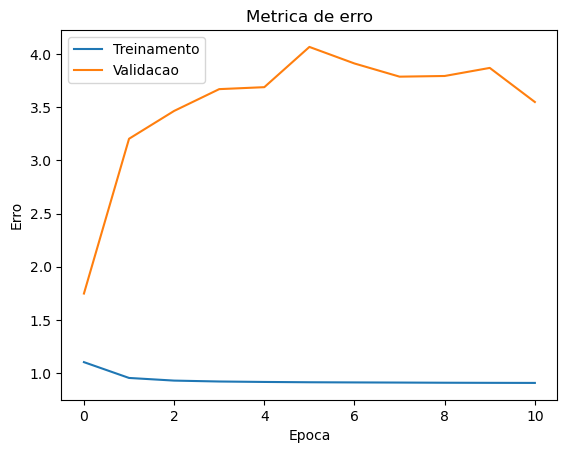

902/902 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step

--> Acuracia (treino): 0.5355
--> Acuracia (validacao): 0.3748
--> acc_train - acc_val = 0.1607
--> E_val - E_in = 2.6403


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# Using target + binary classification

In [42]:
# transforming target

median = df['proficiencia'].median()

print(median)

df['target'] = np.where(df['proficiencia'] > median, 1, 0)
df['target'].value_counts()

-0.195712


target
0    18027
1    18026
Name: count, dtype: int64

In [43]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.5389 - loss: 0.7466 - val_accuracy: 0.5054 - val_loss: 2.0473
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6221 - loss: 0.6679 - val_accuracy: 0.5054 - val_loss: 4.0604
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.6291 - loss: 0.6558 - val_accuracy: 0.5054 - val_loss: 4.7693
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.6313 - loss: 0.6497 - val_accuracy: 0.5054 - val_loss: 5.1354
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6353 - loss: 0.6458 - val_accuracy: 0.5054 - val_loss: 5.2629
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.6332 - loss: 0.6458 - val_accuracy: 0.5054 - val_loss: 5.3268
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6371 - loss: 0.6440 - val_accuracy: 0.5054 - val_loss: 5.3226
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6309 - loss: 0

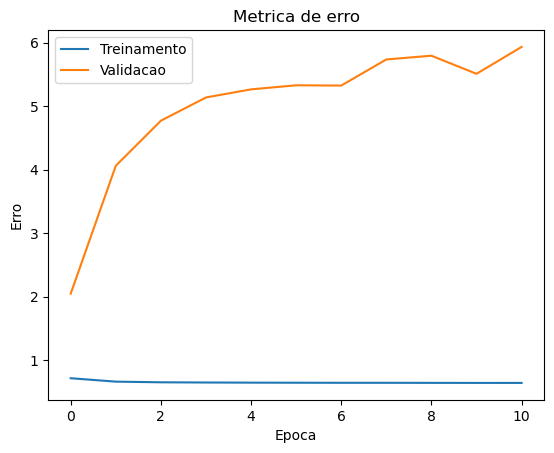

902/902 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step

--> Acuracia (treino): 0.6359
--> Acuracia (validacao): 0.5054
--> acc_train - acc_val = 0.1306
--> E_val - E_in = 5.2880


In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# using softmax + smote

In [61]:
df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_new.pkl'))

df = df.dropna()

exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
         'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

In [62]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

y = to_categorical(y)

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [64]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))

model.add(Dense(4, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184 (736.00 B)

 Trainable params: 184 (736.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.4517 - loss: 1.2875 - val_accuracy: 0.1963 - val_loss: 10.4632
Epoch 2/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.5192 - loss: 1.1397 - val_accuracy: 0.1963 - val_loss: 11.8464
Epoch 3/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.5171 - loss: 1.1305 - val_accuracy: 0.1963 - val_loss: 12.8631
Epoch 4/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.5180 - loss: 1.1253 - val_accuracy: 0.1963 - val_loss: 12.9480
Epoch 5/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.5158 - loss: 1.1206 - val_accuracy: 0.1963 - val_loss: 14.0214
Epoch 6/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.5154 - loss: 1.1233 - val_accuracy: 0.1963 - val_loss: 14.4890
Epoch 7/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.5191 - loss: 1.1191 - val_accuracy: 0.1963 - val_loss: 14.8943
Epoch 8/100
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - acc

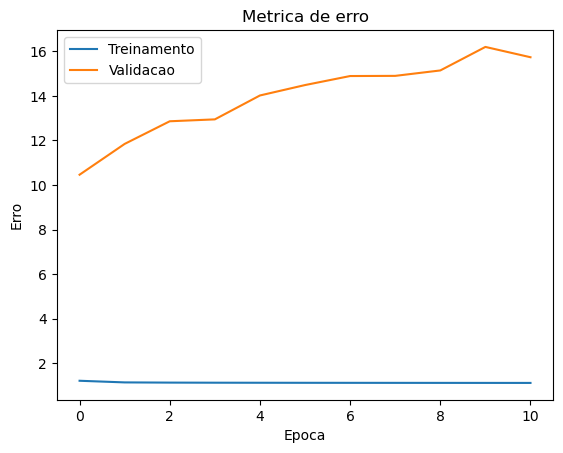

2717/2717 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step
544/544 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step

--> Acuracia (treino): 0.3020
--> Acuracia (validacao): 0.1963
--> acc_train - acc_val = 0.1057
--> E_val - E_in = 14.6253


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")